In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.optimize import curve_fit

In [2]:
def f(x, a, b):
    return a*x+b

In [3]:
def ln(x, a, b):
    return a*np.log10(x)+b

In [4]:
def I_model(t, x, a, b, c, d):
    val = ln(t, f(x, a, b), f(x, c, d))
    return val

In [5]:
def area_to_diameter(x):
    val = (x/np.pi)**0.5
    return val

In [6]:
def I_convertor(input_path):
    df = pd.read_csv(input_path)
    data = np.zeros_like(df.iloc[1:, 1:])
    
    for di, i in enumerate(df.index[1:]):
        data[di, :] = df.iloc[di+1, 1:]-[float(j) for j in df.iloc[0, 1:]]
    df_I = pd.DataFrame(data, index = df.iloc[1:, 0], columns = df.iloc[0, 1:])
    return df_I

In [12]:
def coefficient(input_path, info_path):
    df = I_convertor(input_path)
    df_info = pd.read_csv(info_path)
    
    t = [int(i) for i in df.index]
    area = df_info["area"]
    
    l_t = []
    
    #t方向フィッティング
    for di, i in enumerate(area):
        y = df.iloc[:, di]
        popt, pcov = curve_fit(ln, t, y)
        l_t.append([popt[0], popt[1]])
    kt = np.array(l_t)
    
    #x方向フィッティング
    popt0, pcov0 = curve_fit(f, area, kt[:, 0])
    popt1, pcov1 = curve_fit(f, area, kt[:, 1])
    k_val = [popt0[0], popt0[1], popt1[0], popt1[1]]
    return k_val

In [8]:
def visualization(input_path, info_path, output_path):
    #軽石情報取得
    df_info = pd.read_csv(info_path)

    #モデル係数取得
    k1, k2, k3, k4 = coefficient(input_path, info_path)
    
    #データ初期化
    t = [i for i in np.arange(10, 70, 10)]
    x = sorted(df_info["area"])
    data = np.zeros((len(t), len(x)))

    #データ格納
    for di, i in enumerate(t):
        for dj, j in enumerate(x):    
            data[di, dj] = I_model(i, j, k1, k2, k3, k4)

    #データ可視化
    plt.figure(figsize=(8, 5))
    
    #カラー取得
    cmap = cm.viridis
    colors = cmap(np.linspace(0, 1, len(x)))
    
    # フォント設定
    plt.rcParams["font.family"] = "Times New Roman"  # 使用するフォント（例: Arial）
    plt.rcParams["font.size"] = 20  # フォントサイズの設定
    
    for di, i in enumerate(t):
        plt.plot(x, data[di, :], label=f"{i}s", color=colors[di])

    plt.ylim(1.5, 5.5)
    plt.xlabel("Surface Area [cm²]")
    plt.ylabel("Water Infiltration [g]")
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.savefig(output_path)
    return data

In [ ]:
input_path = "入力パス"
info_path = "軽石情報（乾燥質量, 表面積, 体積...）パス"
output_path = "出力パス"

array([[1.85797581, 2.1039149 , 2.13124146, 2.15856803, 2.21322116,
        2.29520086, 2.34985399, 2.78707903],
       [1.97553322, 2.38540493, 2.43094623, 2.47648753, 2.56757014,
        2.70419404, 2.79527664, 3.52393746],
       [2.0442999 , 2.55006605, 2.60626229, 2.66245852, 2.774851  ,
        2.94343971, 3.05583219, 3.954972  ],
       [2.09309064, 2.66689497, 2.730651  , 2.79440704, 2.92191911,
        3.11318722, 3.2406993 , 4.26079588],
       [2.13093567, 2.75751452, 2.82713439, 2.89675426, 3.035994  ,
        3.24485362, 3.38409336, 4.49801131],
       [2.16185732, 2.83155608, 2.90596706, 2.98037803, 3.12919998,
        3.3524329 , 3.50125485, 4.69183043]])

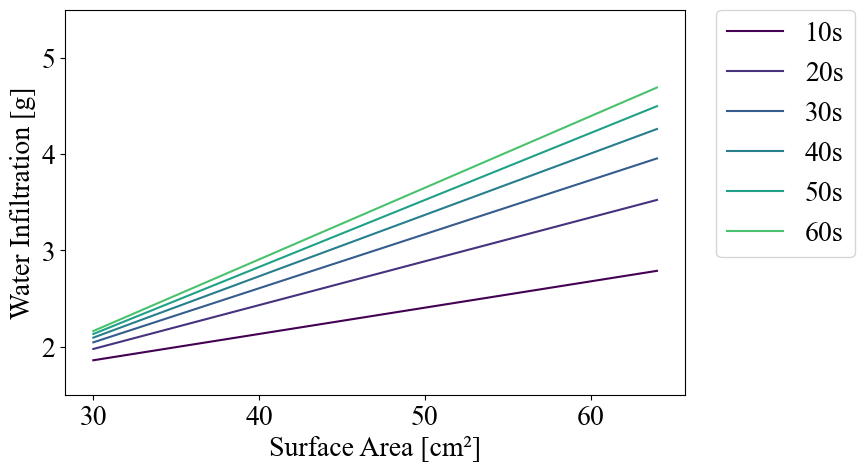

In [11]:
model = visualization(input_path, info_path, output_path)
model